<a href="https://colab.research.google.com/github/JeanCCA/ProyectoS4/blob/main/proyecto4to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escriba el ID del usuario: 183782


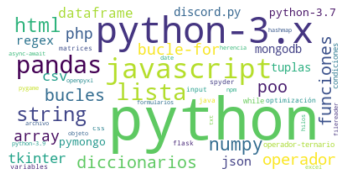

In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup as bs
import requests
import matplotlib.pyplot as plt

# % matplotlib inline

usuario = input("Escriba el ID del usuario: ")

url = "https://es.stackoverflow.com/users/" + usuario + "?tab=tags"

res = requests.get(url)
soup = bs(res.content)

etiqueta = soup.find_all('a', class_='post-tag')
frecuencia = soup.find_all('div', class_='answer-votes')

frecu = []
text = [i.text for i in etiqueta]
for i in frecuencia:
    freq = str(i.text)
    if len(freq) > 1 and freq[1] == 'k':
        freq = freq[0] + "000"
    if int(freq) >= 0:
        if int(freq) == 0:
            freq = str("1")
        frecu.append(int(freq))

if len(text) > len(frecu):
    text.pop(0)

diccionario = dict(zip(text, frecu))

wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate_from_frequencies(diccionario)
# Display the generated image:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

abc = 'Hola mundo'
if abc.endswith('o'):
    abc = abc.replace('mundo', 'world')
    print(abc)
